# Principal Component Analysis

* Based on http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html and https://plot.ly/ipython-notebooks/principal-component-analysis/, all images and some resources are taken from this source.

## The PCA Approach
* Standardize the data.
* Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Value Decomposition.
* Sort eigenvalues in descending order and choose the k eigenvectors that correspond to the k largest eigenvalues where k is the number of dimensions of the new feature subspace (k≤d).
* Construct the projection matrix W from the selected k eigenvectors.
* Transform the original dataset X via W to obtain a k-dimensional feature subspace Y.

## Preparing the Iris Dataset
This dataset contains measurements of 150 iris flowers from three different species(50 each).

The three classes are *Iris-setosa, Iris-versicolor and Iris-virginica*.

And there are four features(measurements all in cm) which are *sepal length, sepal width, petal length and petal width*.

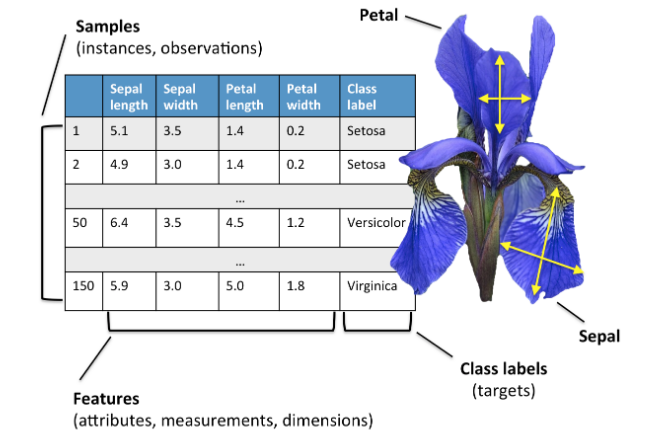

## Loading the Dataset
Using pandas to make the initial pre-processing.
* Pandas cheat-sheet: http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [1]:
import pandas as pd

df = pd.read_csv(filepath_or_buffer='datasets/iris/iris.data', 
                 header=None, sep=',')

df.columns=['sepa_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
# Dropping the empty line at the end of file
df.dropna(how='all', inplace=True)

# lower function in python to convert the character column to lowercase 
 
# Lower case labels
df['class'] = df['class'].str.lower()

df.tail()

,sepa_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,iris-virginica
146,6.3,2.5,5.0,1.9,iris-virginica
147,6.5,3.0,5.2,2.0,iris-virginica
148,6.2,3.4,5.4,2.3,iris-virginica
149,5.9,3.0,5.1,1.8,iris-virginica


## Spltting into X and y
The iris dataset will be stored in a form of a $150x4$ matrix where the columns are the different features and every row represents a sample of a flower. Each row $x$ can be viewed as:

$$\mathbf{x^T} = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix}
= \begin{pmatrix} \text{sepal length} \\ \text{sepal width} \\\text{petal length} \\ \text{petal width} \end{pmatrix}$$

In [2]:
# Splitting the data into data X and class label y
X = df.iloc[:, 0:4].values
y = df.iloc[:, -1].values

## Visualization
To get a grasp of the dataset and how the variables and classes are distributed, we're going to use histograms.

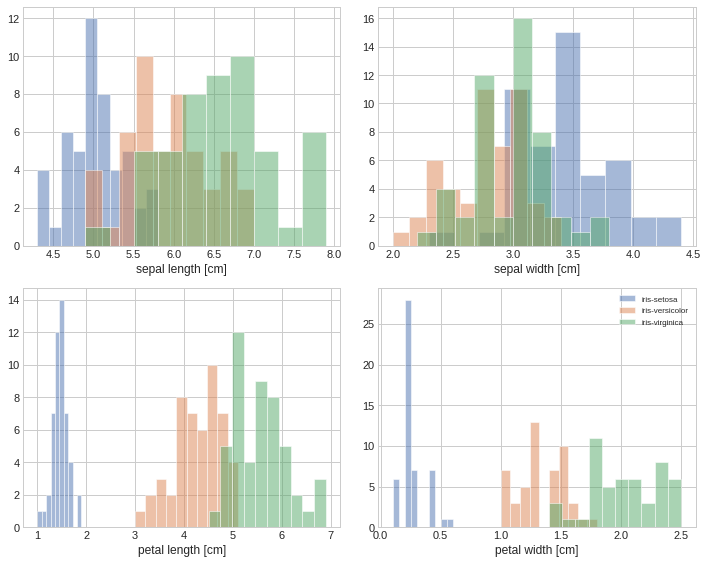

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

sns.set()
plt.figure(figsize=(10, 8))
style.use('seaborn-whitegrid')

labels = np.unique(y)
features = ['sepal length [cm]', 'sepal width [cm]', 'petal length [cm]', 'petal width [cm]']

# Creating the four histograms one for each feature
for count, feature in zip(range(len(features)),features):
    plt.subplot(2,2, count+1) # Changing where the subplot will be
    for label in labels:
        # Getting only the indexes for that label
        idx = (y==label)
        # Count will index the column feature
        plt.hist(X[idx, count],
                label=label,
                bins=10,
                alpha=0.5)
    
    plt.xlabel(feature)

plt.legend(loc='upper right', fancybox=True, fontsize=8)

plt.tight_layout()
plt.show()

## Standardizing the Data
Whether to standardize the data prior to a PCA on the covariance matrix depends on the measurement scales of the original features. **Since PCA yields a feature subspace that maximizes the variance along the axes**, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the **Iris dataset were measured in centimeters**, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

**It is a common practice to normalize your data before feeding it to any machine learning algorithm.**

While applying StandardScaler, each feature of your data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.

In [4]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print('Mean: %d\nStandard Deviation: %d' % (np.mean(X_std), np.std(X_std)))

Mean: 0
Standard Deviation: 1


## Eigendecomposition
The eigenvectors and eigenvalues of a covariance(or correlation) matrix represent the "core" of a PCA. The PCs will determine the new feature space, and the eigenvalues determine their magnitude(represents the variance of the data along the new feature axes).

### Covariance Matrix
The PCA approach(classic) is to perform the eigendecomposition on the covariance matriz $\sum$, which is a $d x d$ matrix where each element represents the covariance(correlation) between two features. The covariance between two features can be calculated as follows: $$\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}\left(  x_{ij}-\bar{x}_j \right)  \left( x_{ik}-\bar{x}_k \right).$$
We can summarize the calculation of the covariance matrix via the following matrix equation: $$\Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)$$
where $\bar{x}$ is the mean vector $\bar{x} = \sum\limits_{k=1}^n x_{i}$.

The mean vector is a $d$-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.

In [5]:
mean_vector = np.mean(X_std, axis=0)
# The shape must be 4 because of the four features(columns) of the dataset
n = X_std.shape[0]
X_cv = X_std - mean_vector
    
cov_matrix = np.dot(X_cv.T, X_cv) / (n-1)
np_cov = np.cov(X_std.T)
print('Mean vector shape: %s\nn: %d\n' % (np.shape(mean_vector), n))
print('Covariance(correlation) matrix:\n%s\n' % (cov_matrix))
print('Numpy Covariance(correlation) matrix:\n%s\n' % (np_cov)) # np.cov assumes m is xT
print('Is the cov_matrix closely equal to the np cov?:%s' % np.allclose(cov_matrix, np_cov))

Mean vector shape: (4,)
n: 150

Covariance(correlation) matrix:
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]

Numpy Covariance(correlation) matrix:
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]

Is the cov_matrix closely equal to the np cov?:True


Now, we perform an eigendecomposition on the covariance matrix

In [6]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

print('Eigenvectors using covariance\n%s' %eigen_vecs)
print('\nEigenvalues using covariance\n%s' %eigen_vals)

Eigenvectors using covariance
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues using covariance
[2.93035378 0.92740362 0.14834223 0.02074601]


### Correlation Matrix
**If the input was normalized the correlation matrix can be understood as the normalized covariance matrix.** This being true then the eigendecomposition of the correlation matrix will yield the **same** values as the covariance matrix.

In [7]:
cor_mat1 = np.corrcoef(X_std.T)

eigen_vals, eigen_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors using correlation with standardized data\n%s' %eigen_vecs)
print('\nEigenvalues using correlation with standardized data\n%s\n' %eigen_vals)

# Eigendecomposition of the raw data based on the correlation matrix
cor_mat2 = np.corrcoef(X.T)

eigen_vals, eigen_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors using raw data\n%s' %eigen_vecs)
print('\nEigenvalues using raw data\n%s' %eigen_vals)

Eigenvectors using correlation with standardized data
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues using correlation with standardized data
[2.91081808 0.92122093 0.14735328 0.02060771]

Eigenvectors using raw data
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues using raw data
[2.91081808 0.92122093 0.14735328 0.02060771]


## Observation about covariance and correlation eigendecompositions
We can clearly see that **all three approaches yield the same** eigenvectors and eigenvalue pairs:

* Eigendecomposition of the covariance matrix after standardizing the data.
* Eigendecomposition of the correlation matrix.
* Eigendecomposition of the correlation matrix after standardizing the data.

## Singular Vector Decomposition
Most PCA implementations use the SVD to improve the computational efficiency.

![SegmentLocal](images/Singular_value_decomposition.gif "segment")

Given an SVD of M, as described above, the following two relations hold:

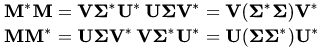

* The columns of $V$ (right-singular vectors) are eigenvectors of M∗M.
* The columns of $U$ (left-singular vectors) are eigenvectors of MM∗.


<img src="images/svd.png" alt="Drawing" style="width: 400px;"/>


In [8]:
# So, let's perform an SVD to confirm that the result are indeed the same:
u,s,v = np.linalg.svd(X_std.T)

print('U: \n%s\n' % (u))

U: 
[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]



## Selecting Principal Components
The goal of PCA analysis is to reduce dimensionality of the original feature space by projecting it onto a smallar subspace, where the eigenvectors will form the new axes. However, the eigenvectors **only define the directions of the new axis**, since they have all the same unit length 1, which can confirmed by the following two lines of code:

In [9]:
for ev in eigen_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('The statement is valid, all eigenvectors only define directions.')

The statement is valid, all eigenvectors only define directions.


To choose which principal components will make the new subspace we're going to take a look a the magnitude of the eigenvectors which are the eigenvalues.

In [10]:
# Each column is an element from the vector so getting all rows that form that vector
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in descending order: \n%s' % ([eig[0] for eig in eigen_pairs]))

Eigenvalues in descending order: 
[2.9108180837520528, 0.9212209307072254, 0.1473532783050958, 0.020607707235624842]


### Explained Variance
source: https://ro-che.info/articles/2017-12-11-pca-explained-variance

As it states in the article to find the individual explained variance we can divide each eigenvalue by the total sum.

$$\vec{EVar} = \frac{eigen values}{eigen values sum}$$

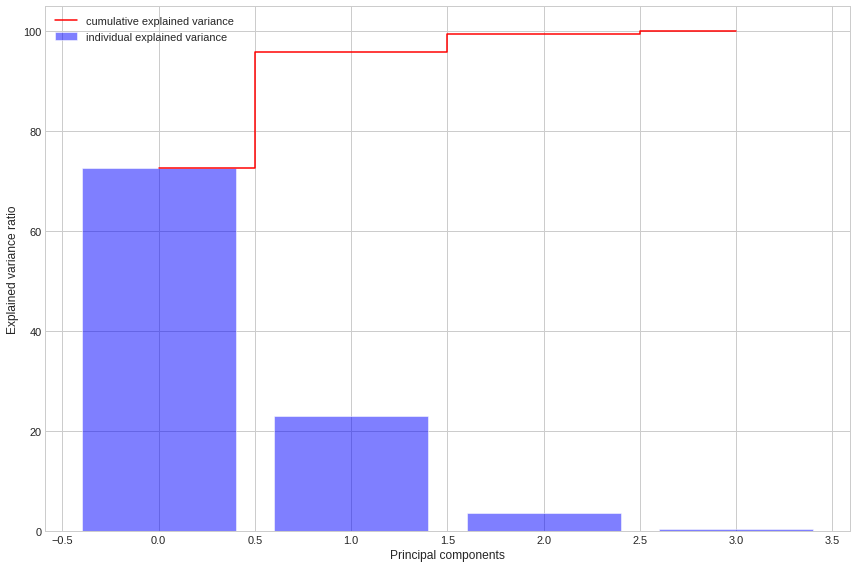

In [11]:
total = sum(eigen_vals)
var_exp = sorted([(eigen_val / total)*100 for eigen_val in eigen_vals], reverse=True)
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(12, 8))

plt.bar(range(len(eigen_vals)), var_exp, alpha=0.5, align='center',
        label='individual explained variance', color='blue')
plt.step(range(len(eigen_vals)), cum_var_exp, where='mid',
         label='cumulative explained variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

### Explained Variance Analysis
The plot above clearly shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (23.03%) while the third and fourth principal components can safely be dropped without losing to much information. **Together, the first two principal components contain 95.8% of the information.**

Now we can use the first two PCs to reduce from a fourth dimensional space to 2D subspace that represents the dataset very well.

## Projection Matrix
The name sounds complicated but the projection matrix $W$ is just the concatenated top $k$ eigenvectors(each column is an eigenvector) that we choose using the Explained Variance Analysis. The eigenvector matrix $W$ will be $d x k$ dimensional.

## Projection Onto the New Feature Space
In this last step we will use the $4×2$-dimensional projection matrix $W$ to transform our samples onto the new subspace via the equation:
$$Y=X×W$$
where $Y$ is a $150×2$ matrix of our transformed samples.

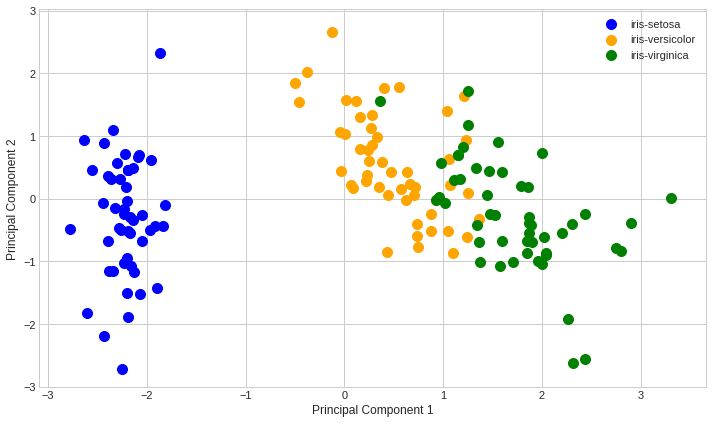

In [12]:
k = 2
top_k = [eigen_pair[1].reshape(eigen_pair[1].shape[0], 1) for eigen_pair in eigen_pairs[:2]]

W = np.hstack((top_k))
Y = X_std.dot(W)

plt.figure(figsize=(10, 6))
for label, color in zip(labels,
                        ('blue', 'orange', 'green')):
    plt.scatter(Y[y==label, 0],
                    Y[y==label, 1],
                    label=label,
                    c=color, s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()